## Clustering

Before implementing a complex Graph Neural Network (GNN) for unsupervised clustering, I want to clarify the problem, as the current research proposal seems vague. This step will help me understand our current leads and establish solid baselines. I aim for this research to be reproducible and fully open-sourced, facilitating easy use of our codebase and baselines by other researchers trying different methods.

### Settings

1. **Chunk Definition:**
   - A Chunk is a of 100 words.
   - For a book with 160 words, it will be split into: 1 chunk of 100 words each, plus 1 sentence of 60 words.

2. **Data Source:**
   - Using non-biblical Hebrew Qumran scrolls (383 books).

3. **Composition Labels:**
   - A composition is a label consisting of several books together.
   - For example, books 11Q20 and 11Q19 are from the Temple Scroll composition.
   - We currently have 25 unique compositions over 98 books.

4. **Clustering Methodology:**
   - **Step 1:** Convert each book into sentences.
   - **Step 2:** Vectorize the text (using n-grams, TF-IDF, Word2Vec, BERT, etc.).
   - **Step 3:** Clustering:
     - **Unsupervised Clustering:** 
       - Hierarchical Clustering
   - **Step 4:** Evaluation:
     - **Unsupervised Evaluation:** Metrics from [Cluster Analysis: Evaluation and Assessment](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment).
       - Examples: [Rand Index](https://en.wikipedia.org/wiki/Rand_index), [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index), etc.
       - The main objective will be the dasgupta score.

### Consideration for Supervised Clustering

- **Question:** Should we also perform supervised clustering?
  - **Labels:** Could be book or composition.
  - **Benefit:** This step could enhance confidence in our unsupervised methods.

### Clustering Objectives
We can explore various clustering strategies:

1. **Clustering by Chunk:**
   - Cluster chunks across all scrolls, when we wish to have chunks from the same composition together, and chunks that are close in the scrolls, also close together.

2. **Clustering by Composition:**
   - Cluster chunks to ensure they belong to the correct composition.

3. **Clustering within a Book:**
   - Cluster chunks to group those that are textually close within each book (as proposed in the research proposal).

4. **Clustering of Serech Hayahad:**
   - Focus specifically on clustering within the Serech Hayahad text.

5. **Temple Scroll Clustering:**
   - Differentiate between sectarian and non-sectarian content within the Temple Scroll.


### Reading list
1. [Document Embedding Techniques](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d)
2. Mining text data - book
3. [clustering-sentence-embeddings-to-identify-intents-in-short-text - PRACTICAL](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)
4. [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)
5. [Open Intent Discovery through Unsupervised
Semantic Clustering and Dependency Parsing](https://arxiv.org/pdf/2104.12114)
6. [Is Everything in Order? A Simple Way to Order Sentences](https://aclanthology.org/2021.emnlp-main.841.pdf)
7. [The performance of BERT as data representation of text clustering](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00564-9)
8. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676)

Word ordering:
1. [Word Ordering as Unsupervised Learning
Towards Syntactically Plausible Word Representations](https://aclanthology.org/I17-1008.pdf)
2. [UNSUPERVISED ORDER LEARNING](https://openreview.net/pdf?id=1CK45cqkEh)
3. [Graph based Neural Sentence Ordering](https://github.com/DeepLearnXMU/NSEG)
4. [Graph based Neural Sentence Ordering](https://arxiv.org/pdf/1611.02654v2)
5. [A New Sentence Ordering Method Using BERT
Pretrained Model](https://arxiv.org/pdf/2108.11994)
6. https://openreview.net/pdf?id=S1AG8zYeg

Surveys:
1. [Short Text Clustering Algorithms, Application and Challenges: A Survey](https://www.mdpi.com/2076-3417/13/1/342)
2. [Incremental hierarchical text clustering methods: a review](https://arxiv.org/html/2312.07769v1)
3. [A comprehensive survey of clustering algorithms: State-of-the-art machine learning applications, taxonomy, challenges, and future research prospects](https://www.sciencedirect.com/science/article/pii/S095219762200046X)
4. [A Systematic Literature Review on Identifying Patterns Using Unsupervised Clustering Algorithms: A Data Mining Perspective](https://www.mdpi.com/2073-8994/15/9/1679)
5. [Constrained Clustering: Current and New Trends](https://link.springer.com/chapter/10.1007/978-3-030-06167-8_14) - offline

Clustering:
1. [Evaluation of Hierarchical Clustering Algorithms for
Document Datasets∗](https://dl.acm.org/doi/pdf/10.1145/584792.584877)
2. [An Objective for Hierarchical Clustering in Euclidean Space and its Connection to
Bisecting K-means∗](https://arxiv.org/pdf/2008.13235)
3. [Hierarchical Clustering: Objective Functions and Algorithms](https://arxiv.org/pdf/1704.02147)
4. [Evaluation Metrics for Unsupervised Learning
Algorithms](https://arxiv.org/pdf/1905.05667)

Stylometry:
1. [https://pan.webis.de/organization.html](PAN - organiztion fot text forensics)
2. [Surveying Stylometry Techniques and Applications](https://dl.acm.org/doi/10.1145/3132039)
3. Advanced Models for Stylometric Applications - offline
4. [A review on authorship attribution in text mining
](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.1584)


Graphs:
1. [Graph Embedding Techniques, Applications, and Performance: A Survey](https://arxiv.org/pdf/1705.02801)


TODO:
1. Reading:
    2. EOSL - page 485(504) - unsupervised learning.
    3. Dasgupta - https://arxiv.org/pdf/1510.05043 

In [2]:

import pandas as pd

from config import BASE_DIR

RERUN = True

In [3]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

clustering_label = "composition"
CHUNK_SIZE = 100

DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_nonbib_22_05_2024.csv"
df = pd.read_csv(DATA_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book", "composition", "section", "text_lex"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner").drop_duplicates(["book"])

df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   book                                                                1508 non-null   object 
 1   sentence_path                                                       1508 non-null   object 
 2   text_lex                                                            1504 non-null   object 
 3   text                                                                1508 non-null   object 
 4   n_words_lex                                                         1508 non-null   int64  
 5   n_words                                                             1508 non-null   int64  
 6   construct to absolute nouns ratio                                   1508 non-null   float64
 7   construct nouns

In [5]:
df["book"].nunique()

107

## Baselines

Our dataset contains chunks of 100 words (using scrolls that have more than 300 words and written in hebrew).
I will use 4 different vectorizers: Starr, trigrams, BERT, tf-idf. When our metric for clustering will be the dgapusta score.

### Unsupervised clustering

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sknetwork.hierarchy import dasgupta_score as calculate_dasgupta_score
import sklearn.cluster as sk
from tqdm.notebook import tqdm
from datetime import datetime
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import scipy.sparse as sp
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def get_starr_features():
    from src.features.Starr.features_keys import feature_list
    return [i[0] for i in feature_list]


def bert_embed(texts, model, tokenizer):
    all_embeddings = []
    for text in tqdm(texts, desc="bert"):
        # Tokenize the text

        inputs = tokenizer(
            text,
            return_tensors='pt',
            padding=True,  # Pad sequences to the length of the longest sequence in the batch
            truncation=True,  # Truncate sequences longer than max_length
            max_length=tokenizer.model_max_length  #512
        )
        with torch.no_grad():
            outputs = model(**inputs)

        # Take the mean of the last hidden state for the embedding
        embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        # print("Shape of last_hidden_state:", outputs.last_hidden_state.shape)
        # print("Shape of pooler_output:", outputs.pooler_output.shape)
        # print("Shape of embedding:", embedding.shape)

        all_embeddings.append(embedding)
    return np.vstack(all_embeddings)


def vectorize_text(df, text_column, vectorizer_type):
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'trigram':
        vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='char')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'BOW':
        vectorizer = CountVectorizer(analyzer='word')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'starr':
        starr_cols = get_starr_features()
        vectorizer_matrix = df[starr_cols].to_numpy()
    elif vectorizer_type == 'bert':
        tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')
        model = AutoModel.from_pretrained('onlplab/alephbert-base')

        vectorizer_matrix = bert_embed(df[text_column].tolist(), model, tokenizer)
    else:
        raise ValueError("Unsupported vectorizer type.")
    return vectorizer_matrix


def get_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in (enumerate(model.children_)):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    return linkage_matrix


def shorten_path(sentence_path):
    splitted = [i.split(":") for i in sentence_path.split("-")]
    return f'{splitted[0][0]}:{splitted[0][1]}-{splitted[1][0]}'


def matplotlib_dendrogram(linkage_matrix, sample_names, metadata):
    plt.figure(figsize=(25, 18))
    dendrogram(
        linkage_matrix,
        leaf_label_func=lambda x: shorten_path(sample_names[x]),
        orientation="right",
        color_threshold=0.7 * max(linkage_matrix[:, 2])  # Adjust color threshold
    )

    plt.title(metadata["vectorizer_type"], fontsize=16)
    plt.ylabel("Scroll:Line-Line")
    plt.tick_params(
        axis="x",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelbottom=False,
    )
    plt.tick_params(
        axis="y",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected,
        labelsize=12,
    )
    plt.tight_layout()
    plt.show()


def get_clusters_scores(
        df,
        label_name,
        vectorizer_matrix,
        linkage_criterion,
        adjacency_matrix,
        plot=False,
        metadata=None
):
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    model = sk.AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage_criterion
    )
    print(f"{datetime.now()} - fitting AgglomerativeClustering")
    model.fit_predict(vectorizer_matrix)
    # adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
    # for i in range(0, adjacency_matrix.shape[0] - 1):
    #     adjacency_matrix[i, i + 1] = 1
    #     adjacency_matrix[i + 1, i] = 1
    print(f"{datetime.now()} - getting linkage matrix")
    linkage_matrix = get_linkage_matrix(model)

    print(f"{datetime.now()} - calculate_dasgupta_score")
    score = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
    if plot:
        matplotlib_dendrogram(linkage_matrix, sample_names, metadata)

    return score, linkage_matrix


def get_random_clusters_score(
        df,
        label_name,
        vectorizer_matrix,
        linkage_criterion,
        iters=10
):
    random_scores = []
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    print(f"{datetime.now()} - calculate rand dasgupta_score")
    for i in tqdm(range(iters)):
        indexes = np.arange(len(vectorizer_matrix))
        np.random.shuffle(indexes)
        model = sk.AgglomerativeClustering(
            distance_threshold=0, n_clusters=None, linkage="ward"
        )
        model.fit_predict(vectorizer_matrix[indexes])
        linkage_matrix = get_linkage_matrix(model)
        adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
        for i in range(0, adjacency_matrix.shape[0] - 1):
            adjacency_matrix[i, i + 1] = 1
            adjacency_matrix[i + 1, i] = 1

        dasgupta_score_rand = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
        random_scores.append(dasgupta_score_rand)

    return np.mean(np.array(random_scores))


def create_adjacency_matrix(sampled_df, context_similiarity_window, composition_level=True):
    # Compress the DataFrame only to the required columns
    compressed_df = sampled_df[["original_index", "book", "composition"]]

    # Convert DataFrame columns to numpy arrays for faster access
    original_indices = compressed_df['original_index'].to_numpy()
    books = compressed_df['book'].to_numpy()
    compositions = compressed_df['composition'].to_numpy()

    # Initialize the adjacency matrix
    n = len(compressed_df)
    adjacency_matrix = np.zeros((n, n))

    # Loop to fill the adjacency matrix
    for i in tqdm(range(n), desc="Building adjacency matrix"):
        for j in range(i + 1, n):  # Only compute half since the matrix is symmetric
            if original_indices[i] == original_indices[j]:
                continue
            distance = np.abs(original_indices[i] - original_indices[j])

            if 0 < distance <= context_similiarity_window and books[i] == books[j]:
                adjacency_matrix[i, j] += 1 / distance
                adjacency_matrix[j, i] += 1 / distance

            if composition_level and compositions[i] == compositions[j] and (compositions[i] is not None) and (
                    books[i] != books[j]):
                adjacency_matrix[i, j] += 1
                adjacency_matrix[j, i] += 1

    return adjacency_matrix


# Define the stratified sampling function
def stratified_sample(df, stratify_column, frac, random_state=None):
    df = df.reset_index().rename(columns={"index": "original_index"})
    grouped = df.groupby(stratify_column)
    stratified_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)
    stratified_df = stratified_df.sort_values(by="original_index")
    return stratified_df


import seaborn as sns
from scipy.stats import ttest_ind


def create_dasgupta_score_plot(scores_df, chunk_size, num_cvs, frac, linkage_method, file_name, show_p_val=False,
                               p_val_random_test=True, show_mean_scores=True):
    """
    This function creates a box plot of Dasgupta scores for different vectorizer types.

    Args:
        scores: A dictionary containing the scores.
        chunk_size: Size of the chunks used for vectorization (in words).
        num_cvs: Number of cross-validation folds used.
        frac: Fraction of the data used in each CV sample.
        p_val_random_test: Whether to calculate p-values against a random baseline (True) or own baseline (False).
        show_mean_scores: Whether to display the mean score for each vectorizer group (True).
    """
    mean_rand_score = scores_df['dasgupta_score_rand'].mean()
    long_scores_df = pd.melt(scores_df, id_vars=['vectorizer'], value_vars=['dasgupta_score', 'dasgupta_score_rand'])

    p_values = {}
    for vectorizer in scores_df['vectorizer'].unique():
        dasgupta_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
        if p_val_random_test:
            rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score_rand']
        else:
            rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
        _, p_value = ttest_ind(dasgupta_scores, rand_scores, alternative='greater')
        p_values[vectorizer] = p_value

    # Set the style of the visualization
    sns.set(style="whitegrid", context="paper", font_scale=1.5)

    # Create the box plot
    plt.figure(figsize=(15, 10))
    ax = sns.boxplot(data=long_scores_df, x="vectorizer", y="value", hue="variable", palette="Set3")
    sns.stripplot(data=long_scores_df, x="vectorizer", y="value", hue="variable",
                  linewidth=1, alpha=0.4, dodge=True, palette="Set3")

    # Plot the mean random score as a dashed line
    plt.axhline(y=mean_rand_score, color='r', linestyle='--', label="Mean random score")

    # Calculate mean for each vectorizer group
    mean_scores = long_scores_df[long_scores_df["variable"] == "dasgupta_score"].groupby('vectorizer')['value'].mean()

    if show_p_val:
        for i, vectorizer in enumerate(p_values.keys()):
            p_val = p_values[vectorizer]
            ax.text(i, long_scores_df[long_scores_df['vectorizer'] == vectorizer]['value'].min() - 0.05,
                    f'$p={p_val:.3f}$', ha='center', va='bottom', fontsize=12, color='black')

    if show_mean_scores:
        for i, vectorizer in enumerate(long_scores_df["vectorizer"].unique()):
            mean_value = mean_scores.loc[vectorizer]
            ax.text(i, min(long_scores_df[(long_scores_df['vectorizer'] == vectorizer) &
                                          (long_scores_df['variable'] == "dasgupta_score")]['value']) - 0.03,
                    f'mean={mean_value:.3f}', ha='center', va='bottom', fontsize=12, color='black')

    # Add a title and labels
    plt.suptitle("Dasgupta Score by Vectorizer Type", fontsize=20)
    plt.title(
        f"Linkage: {linkage_method}, Chunk size: {chunk_size} words, {num_cvs} cross-validation, each CV sample {frac:.0%} from the data",
        fontsize=16)
    plt.xlabel('Vectorizer Type', fontsize=16)
    plt.ylabel('Dasgupta Score', fontsize=16)

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles[0:2], labels=labels[0:2], title='Score Type', fontsize=14, title_fontsize=16,
               loc='best', ncol=3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Improve layout
    plt.tight_layout()
    # plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Remove top and right spines for a cleaner look
    sns.despine(offset=5, trim=True)
    plt.savefig(f"{file_name}.png")
    plt.show()


from itertools import groupby
from collections import Counter


def get_metrics_from_LCA(feature_order):
    n_chunks_df = pd.DataFrame([Counter([i.split(":")[0] for i in feature_order])], index=["n_chunks"]).T
    scrolls = [item.split(':')[0] for item in feature_order]

    # Initialize a dictionary to store the results
    scroll_analysis = {}

    # Group by consecutive scrolls
    for scroll, group in groupby(scrolls):
        group_list = list(group)
        if scroll not in scroll_analysis:
            scroll_analysis[scroll] = {
                'sequences': [],
            }
        scroll_analysis[scroll]['sequences'].append(len(group_list))

    # Compute the number of sequences and mean sequence length for each scroll
    for scroll in scroll_analysis:
        sequences = scroll_analysis[scroll]['sequences']
        number_of_sequences = len(sequences)
        scroll_analysis[scroll] = {
            'n_sequences': number_of_sequences,
        }
    res = pd.DataFrame(scroll_analysis).T.join(n_chunks_df)
    res["1-n_sequences/n_chunks"] = 1 - res["n_sequences"] / res["n_chunks"]

    # Initialize a dictionary to store the first and last occurrence of each scroll
    scroll_positions = {}

    for index, scroll in enumerate(scrolls):
        if scroll not in scroll_positions:
            scroll_positions[scroll] = [index, index]  # [first_occurrence, last_occurrence]
        else:
            scroll_positions[scroll][1] = index  # Update last_occurrence

    # Calculate the maximum distance between the first and last occurrence for each scroll
    max_distances = {scroll: positions[1] - positions[0] + 1 for scroll, positions in scroll_positions.items()}
    max_distances = pd.DataFrame([max_distances]).T.rename(columns={0: "max_dist"}).sort_values(by="max_dist")
    final_res = max_distances.join(res)
    final_res["n_chunks/max_dist"] = final_res["n_chunks"] / final_res["max_dist"]
    return final_res.sort_values(by="n_chunks/max_dist"), final_res['n_chunks/max_dist'].mean(), final_res[
        'n_chunks/max_dist'].std()


def create_lca_metric_boxplot(scores_df, file_name):
    # Set the style of the visualization
    sns.set(style="whitegrid", context="paper", font_scale=1.5)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='vectorizer', y='max_dist_metric_mean', hue='vectorizer', data=scores_df, palette="Set3",
                legend=False)

    # Add a title and labels
    plt.title("max-dist Metric Mean by Vectorizer Type", fontsize=20)
    plt.xlabel('Vectorizer Type', fontsize=16)
    plt.ylabel('max-dist Metric Mean', fontsize=16)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Improve layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"{file_name}.png")
    plt.show()


def get_dendrogram_feature_order(linkage_matrix, sample_names):
    dendro = dendrogram(
        linkage_matrix,
        leaf_label_func=lambda x: sample_names[x],
        orientation="right",
        no_plot=True  # Do not plot the dendrogram
    )

    feature_order = [sample_names[i] for i in dendro['leaves']]
    return feature_order


In [7]:
def run_clustering_cv(df, frac, num_cvs, context_similiarity_window, vectorizers, linkage_method):
    scores = []
    for i in tqdm(range(num_cvs)):
        # Sample 90% of the data
        sampled_df = stratified_sample(df, 'book', frac=frac, random_state=42 + i)
        print(f"{datetime.now()} - {sampled_df.shape=}")
        adjacency_matrix = create_adjacency_matrix(sampled_df, context_similiarity_window=context_similiarity_window,
                                                   composition_level=True)

        for vectorizer_type in tqdm(vectorizers):
            vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
            print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")

            dasgupta_score, linkage_matrix = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix,
                                                                 linkage_method, adjacency_matrix, plot=False,
                                                                 metadata={"vectorizer_type": vectorizer_type})
            dasgupta_score_rand = get_random_clusters_score(sampled_df, "sentence_path", vectorizer_matrix, "ward",
                                                            iters=2)
            print(f"{dasgupta_score=}, {dasgupta_score_rand=}\n")

            feature_order = get_dendrogram_feature_order(linkage_matrix, df["sentence_path"].to_list())
            _, LCA_metric_mean, LCA_metric_std = get_metrics_from_LCA(feature_order)

            scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score,
                           "dasgupta_score_rand": dasgupta_score_rand, "max_dist_metric_mean": LCA_metric_mean,
                           "cv": i})

    # Convert scores to a DataFrame for easier analysis
    scores_df = pd.DataFrame(scores)
    return scores_df



  0%|          | 0/5 [00:00<?, ?it/s]

2024-06-16 12:57:01.028499 - sampled_df.shape=(1345, 26)


Building adjacency matrix:   0%|          | 0/1345 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-16 12:57:02.970465 - vectorizer_type='trigram',vectorizer_matrix.shape=(1345, 7626)
2024-06-16 12:57:03.010013 - fitting AgglomerativeClustering
2024-06-16 12:57:07.093690 - getting linkage matrix
2024-06-16 12:57:07.096196 - calculate_dasgupta_score
2024-06-16 12:57:07.198510 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5922296021423703, dasgupta_score_rand=0.32450046468401494

2024-06-16 12:57:15.221180 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1345, 19602)
2024-06-16 12:57:15.294316 - fitting AgglomerativeClustering
2024-06-16 12:57:25.666395 - getting linkage matrix
2024-06-16 12:57:25.668628 - calculate_dasgupta_score
2024-06-16 12:57:25.785021 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6356198742550834, dasgupta_score_rand=0.329460966542751


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream

bert:   0%|          | 0/1345 [00:00<?, ?it/s]

2024-06-16 12:59:54.854229 - vectorizer_type='bert',vectorizer_matrix.shape=(1345, 768)
2024-06-16 12:59:54.854461 - fitting AgglomerativeClustering
2024-06-16 12:59:55.226446 - getting linkage matrix
2024-06-16 12:59:55.232735 - calculate_dasgupta_score
2024-06-16 12:59:55.308393 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.65394178079518, dasgupta_score_rand=0.327676911842804

2024-06-16 12:59:56.242814 - vectorizer_type='starr',vectorizer_matrix.shape=(1345, 16)
2024-06-16 12:59:56.242912 - fitting AgglomerativeClustering
2024-06-16 12:59:56.291883 - getting linkage matrix
2024-06-16 12:59:56.294341 - calculate_dasgupta_score
2024-06-16 12:59:56.393656 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4727518997252884, dasgupta_score_rand=0.3382708775889538

2024-06-16 12:59:56.704107 - sampled_df.shape=(1345, 26)


Building adjacency matrix:   0%|          | 0/1345 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-16 12:59:58.661901 - vectorizer_type='trigram',vectorizer_matrix.shape=(1345, 7617)
2024-06-16 12:59:58.672406 - fitting AgglomerativeClustering
2024-06-16 13:00:02.586333 - getting linkage matrix
2024-06-16 13:00:02.588789 - calculate_dasgupta_score
2024-06-16 13:00:02.673508 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.597918798711442, dasgupta_score_rand=0.3326047751814481

2024-06-16 13:00:10.792746 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1345, 19423)
2024-06-16 13:00:10.816548 - fitting AgglomerativeClustering
2024-06-16 13:00:21.191635 - getting linkage matrix
2024-06-16 13:00:21.193800 - calculate_dasgupta_score
2024-06-16 13:00:21.286419 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6925846650242244, dasgupta_score_rand=0.33294416047087994


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1345 [00:00<?, ?it/s]

2024-06-16 13:02:39.486005 - vectorizer_type='bert',vectorizer_matrix.shape=(1345, 768)
2024-06-16 13:02:39.486240 - fitting AgglomerativeClustering
2024-06-16 13:02:39.913813 - getting linkage matrix
2024-06-16 13:02:39.916436 - calculate_dasgupta_score
2024-06-16 13:02:40.006236 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6484786246463119, dasgupta_score_rand=0.3263016684368915

2024-06-16 13:02:41.008376 - vectorizer_type='starr',vectorizer_matrix.shape=(1345, 16)
2024-06-16 13:02:41.008462 - fitting AgglomerativeClustering
2024-06-16 13:02:41.060013 - getting linkage matrix
2024-06-16 13:02:41.062411 - calculate_dasgupta_score
2024-06-16 13:02:41.170548 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.48896794751407113, dasgupta_score_rand=0.3400754005133652

2024-06-16 13:02:41.525947 - sampled_df.shape=(1345, 26)


Building adjacency matrix:   0%|          | 0/1345 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-16 13:02:43.659826 - vectorizer_type='trigram',vectorizer_matrix.shape=(1345, 7608)
2024-06-16 13:02:43.671035 - fitting AgglomerativeClustering
2024-06-16 13:02:47.538691 - getting linkage matrix
2024-06-16 13:02:47.544371 - calculate_dasgupta_score
2024-06-16 13:02:47.636636 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5789816084913559, dasgupta_score_rand=0.33341824880509846

2024-06-16 13:02:55.802968 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1345, 19487)
2024-06-16 13:02:55.824936 - fitting AgglomerativeClustering
2024-06-16 13:03:06.062182 - getting linkage matrix
2024-06-16 13:03:06.064730 - calculate_dasgupta_score
2024-06-16 13:03:06.154451 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6357980365173244, dasgupta_score_rand=0.3274805275269961


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1345 [00:00<?, ?it/s]

2024-06-16 13:05:23.602691 - vectorizer_type='bert',vectorizer_matrix.shape=(1345, 768)
2024-06-16 13:05:23.602955 - fitting AgglomerativeClustering
2024-06-16 13:05:23.955244 - getting linkage matrix
2024-06-16 13:05:23.961267 - calculate_dasgupta_score
2024-06-16 13:05:24.042549 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6572388322409164, dasgupta_score_rand=0.3336317821738361

2024-06-16 13:05:24.888721 - vectorizer_type='starr',vectorizer_matrix.shape=(1345, 16)
2024-06-16 13:05:24.888794 - fitting AgglomerativeClustering
2024-06-16 13:05:24.931559 - getting linkage matrix
2024-06-16 13:05:24.933686 - calculate_dasgupta_score
2024-06-16 13:05:25.022976 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4764988803895879, dasgupta_score_rand=0.3365803128872368

2024-06-16 13:05:25.325250 - sampled_df.shape=(1345, 26)


Building adjacency matrix:   0%|          | 0/1345 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-16 13:05:27.183284 - vectorizer_type='trigram',vectorizer_matrix.shape=(1345, 7578)
2024-06-16 13:05:27.194196 - fitting AgglomerativeClustering
2024-06-16 13:05:30.966243 - getting linkage matrix
2024-06-16 13:05:30.972105 - calculate_dasgupta_score
2024-06-16 13:05:31.068365 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5664164297119835, dasgupta_score_rand=0.3433851677288015

2024-06-16 13:05:38.934639 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1345, 19437)
2024-06-16 13:05:38.955069 - fitting AgglomerativeClustering
2024-06-16 13:05:49.592574 - getting linkage matrix
2024-06-16 13:05:49.597751 - calculate_dasgupta_score
2024-06-16 13:05:49.696022 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6280289965357363, dasgupta_score_rand=0.3350410470879803


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1345 [00:00<?, ?it/s]

2024-06-16 13:08:13.791141 - vectorizer_type='bert',vectorizer_matrix.shape=(1345, 768)
2024-06-16 13:08:13.791389 - fitting AgglomerativeClustering
2024-06-16 13:08:14.168143 - getting linkage matrix
2024-06-16 13:08:14.174744 - calculate_dasgupta_score
2024-06-16 13:08:14.255727 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6775112113617899, dasgupta_score_rand=0.3317229819437069

2024-06-16 13:08:15.117458 - vectorizer_type='starr',vectorizer_matrix.shape=(1345, 16)
2024-06-16 13:08:15.117530 - fitting AgglomerativeClustering
2024-06-16 13:08:15.161351 - getting linkage matrix
2024-06-16 13:08:15.163516 - calculate_dasgupta_score
2024-06-16 13:08:15.260653 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5110561301276848, dasgupta_score_rand=0.3361073309435298

2024-06-16 13:08:15.571762 - sampled_df.shape=(1345, 26)


Building adjacency matrix:   0%|          | 0/1345 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-16 13:08:17.437151 - vectorizer_type='trigram',vectorizer_matrix.shape=(1345, 7617)
2024-06-16 13:08:17.447497 - fitting AgglomerativeClustering
2024-06-16 13:08:21.412901 - getting linkage matrix
2024-06-16 13:08:21.418625 - calculate_dasgupta_score
2024-06-16 13:08:21.509347 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5932306615352161, dasgupta_score_rand=0.3368784851301116

2024-06-16 13:08:30.975138 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1345, 19496)
2024-06-16 13:08:30.997431 - fitting AgglomerativeClustering
2024-06-16 13:08:41.399236 - getting linkage matrix
2024-06-16 13:08:41.403064 - calculate_dasgupta_score
2024-06-16 13:08:41.518987 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6568984370368408, dasgupta_score_rand=0.32594236811825095


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1345 [00:00<?, ?it/s]

2024-06-16 13:11:44.934891 - vectorizer_type='bert',vectorizer_matrix.shape=(1345, 768)
2024-06-16 13:11:44.935117 - fitting AgglomerativeClustering
2024-06-16 13:11:45.346664 - getting linkage matrix
2024-06-16 13:11:45.349220 - calculate_dasgupta_score
2024-06-16 13:11:45.441512 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7139076414442016, dasgupta_score_rand=0.3391869689325545

2024-06-16 13:11:46.462887 - vectorizer_type='starr',vectorizer_matrix.shape=(1345, 16)
2024-06-16 13:11:46.462974 - fitting AgglomerativeClustering
2024-06-16 13:11:46.517172 - getting linkage matrix
2024-06-16 13:11:46.524399 - calculate_dasgupta_score
2024-06-16 13:11:46.627562 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5003778888795094, dasgupta_score_rand=0.33410642370331034


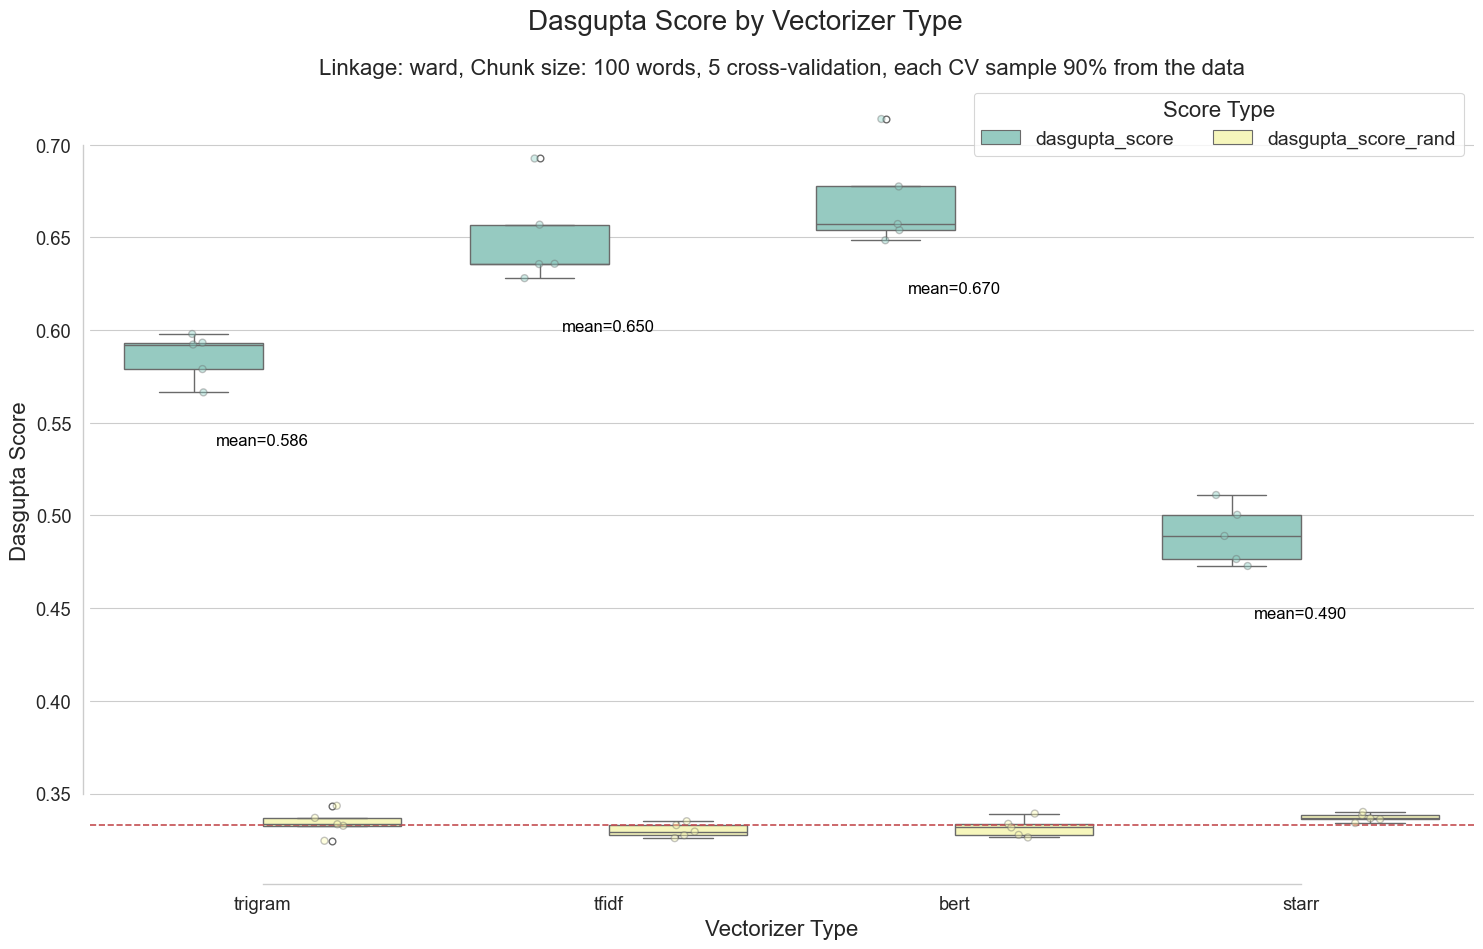

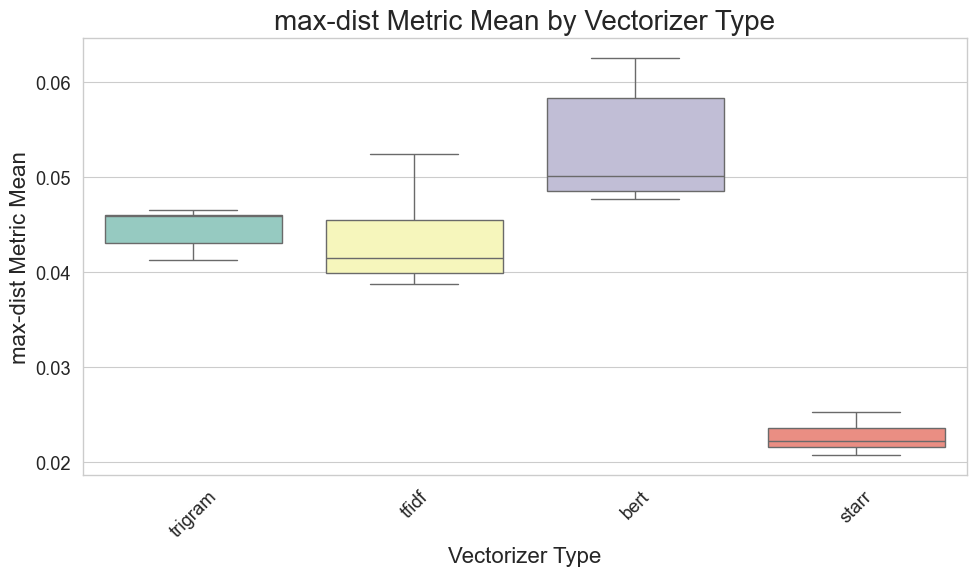

In [8]:

# Cross validation with overlapping

PATH = f"{BASE_DIR}/notebooks/reports/clustering_baseline"
NUM_CVS = 5
FRAC = 0.9
CONTEXT_SIMILIARITY_WINDOW = 3
vectorizers = ["trigram",
               "tfidf",
               "bert", "starr"
               ]
linkage_method = "ward"
file_name = 'dasgupta_scores_window_{}_composition_frac_{}_linkage_{}'.format(CONTEXT_SIMILIARITY_WINDOW,
                                                                              str(FRAC).replace(".", "_"),
                                                                              linkage_method)
if RERUN:
    scores_df = run_clustering_cv(df, FRAC, NUM_CVS, CONTEXT_SIMILIARITY_WINDOW, vectorizers, linkage_method)
    scores_df.to_csv(f"{PATH}/{file_name}.csv", index=False)
else:
    scores_df = pd.read_csv(f"{PATH}/{file_name}.csv")

create_dasgupta_score_plot(scores_df, CHUNK_SIZE, NUM_CVS, FRAC, linkage_method, f"{PATH}/{file_name}",
                           show_p_val=False,
                           p_val_random_test=False, show_mean_scores=True)

create_lca_metric_boxplot(scores_df, f"{PATH}/{file_name}_max_dist")

In [9]:
# plt.figure(figsize=(12, 10))
# j = 300
# k = 360
# # Create the heatmap with custom labels
# sns.heatmap(adjacency_matrix[j:k, j:k], 
#             xticklabels=sample_names[j:k], 
#             yticklabels=sample_names[j:k], 
#             cmap='viridis')

# # Display the plot
# plt.title(f"Adjacency matrix for dasgupta cost")
# plt.tight_layout()
# plt.show()

TODO:

1. See if im doing bert the right way/ compare other models. https://huggingface.co/docs/transformers/en/autoclass_tutorial
2. Understand dgapudsta score
3. More plots to understand how good our clustering is




In [10]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


def cluster_data(data, num_clusters=5, random_state=42):
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(data)
    return clusters


def plot_tsne(data, clusters, clustering_labels, random_state=42, metadata=None):
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=40)
    if type(data) != np.ndarray:
        data = data.toarray()
    tsne_results = tsne.fit_transform(data)
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    tsne_df['Cluster'] = tsne_df['Cluster'].astype(str)

    plt.figure(figsize=(30, 20))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='pastel', data=tsne_df)

    for i, text in enumerate(clustering_labels):
        plt.text(tsne_df.loc[i, "TSNE1"], tsne_df.loc[i, "TSNE2"], text,
                 fontdict=dict(color='black', size=10), ha='right')
    plt.title(
        f't-SNE Clustering, vectorizer_type:{metadata.get("vectorizer_type")}, Frac from data: {metadata.get("frac")}')
    plt.show()


FRAC = 0.25
vectorizer_type = "tfidf"
sampled_df = stratified_sample(df, 'book', frac=FRAC, random_state=42)
vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 

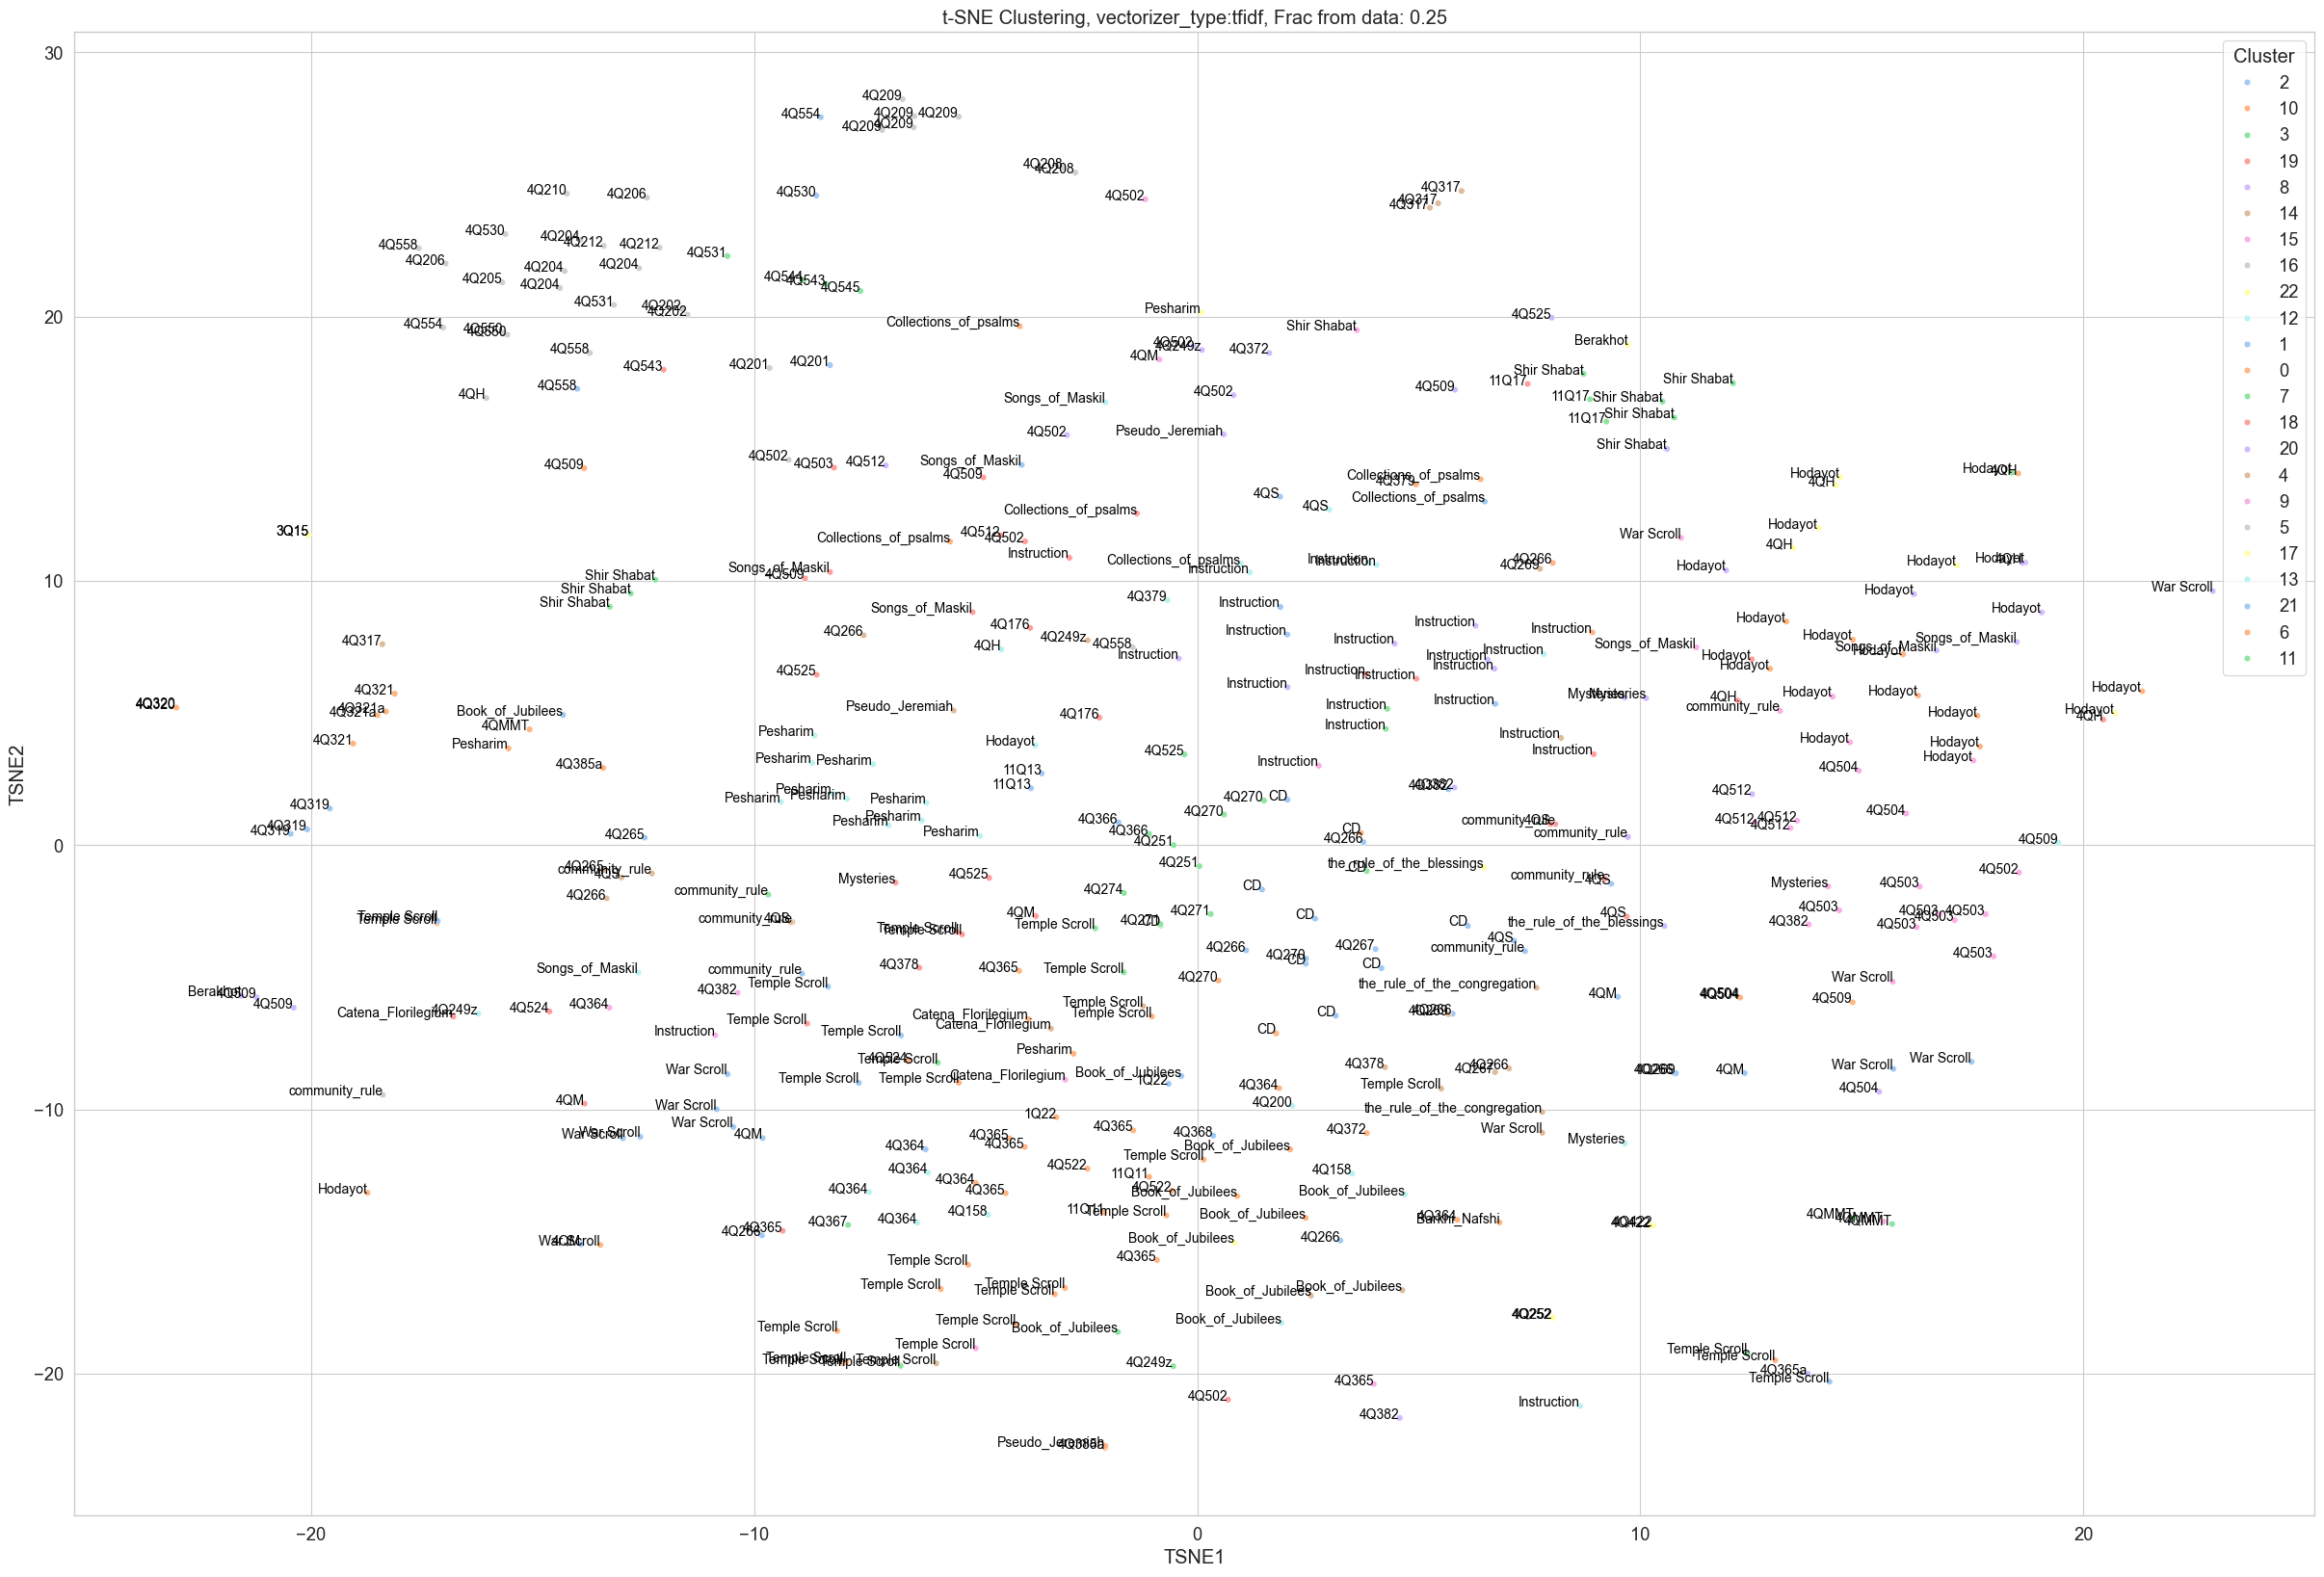

In [11]:

clusters = cluster_data(vectorizer_matrix, sampled_df["composition"].nunique() + 1)

plot_tsne(vectorizer_matrix, clusters, sampled_df['composition'].fillna(sampled_df['book']),
          metadata={"vectorizer_type": vectorizer_type, "frac": FRAC})


### Supervised

In [12]:
vectorizers = ["trigram",
               "tfidf",
               "bert", "starr"
               ]

In [13]:
from sklearn.metrics import adjusted_rand_score

FRAC = 1

clustering_label = 'composition'
df_sampled = stratified_sample(df, 'book', frac=FRAC, random_state=42)
df_sampled = df_sampled.dropna(subset=[clustering_label])
for vectorizer_type in vectorizers:
    X = vectorize_text(df_sampled, "text", vectorizer_type)

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(df_sampled[clustering_label])

    X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.3, random_state=42)

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    # Compute Jaccard Index
    jaccard_index = jaccard_score(y_test, y_pred, average='macro')
    rand_index = adjusted_rand_score(y_test, y_pred)
    print(f"{vectorizer_type}, Jaccard Index: {jaccard_index}")

    unique_classes = sorted(set(y_test))
    target_names = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]

# Print classification report
# print(classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names))



trigram, Jaccard Index: 0.24122398430790457
tfidf, Jaccard Index: 0.25034451783934186


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/812 [00:00<?, ?it/s]

bert, Jaccard Index: 0.27841723891960474
starr, Jaccard Index: 0.21583140999824635


### 
Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The formula for the Silhouette Score for a single sample is:
$$ s = \frac{b - a}{\max(a, b)} $$
where $a$ is the mean distance to the other samples in the same cluster (cohesion), and $b$ is the mean distance to the samples in the nearest cluster (separation). A higher Silhouette Score is better, with a maximum of 1 indicating perfect clustering.

### Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The formula is:
$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$
where $\sigma$ is the average distance of all points in the cluster to the cluster centroid $c$, and $d(c_i, c_j)$ is the distance between centroids $c_i$ and $c_j$. A lower Davies-Bouldin Index indicates better clustering.

### Adjusted Rand Index
The Adjusted Rand Index is a measure of the similarity between two data clusterings, corrected for chance. It has a maximum of 1 and can be less than 0. The formula for the Adjusted Rand Index is:
$$ ARI = \frac{\sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}} $$
where $n_{ij}$ is the number of objects in both clusters $i$ and $j$, $a_i$ is the number of objects in cluster $i$, and $b_j$ is the number of objects in cluster $j$. Higher values are better.

### Mutual Information
Mutual Information measures the amount of information shared between two clusterings, reflecting how much knowing one of these clusterings reduces uncertainty about the other. The formula is:
$$ MI = \sum_{k,l} P(k,l) \log \frac{P(k,l)}{P(k)P(l)} $$
where $P(k,l)$ is the joint probability distribution function of clusterings $k$ and $l$, and $P(k)$ and $P(l)$ are the marginal probability distributions. Higher values indicate more shared information.

### Jaccard Index
The Jaccard Index, or Jaccard similarity coefficient, measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:
$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$
where $A$ and $B$ are sets of labels. Higher values are better, indicating a greater overlap between the clusters compared to the total size.
